In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
import os
import random

In [12]:
pokemon= pd.read_csv('pokemon.csv')
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [13]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [21]:
pokemon2= pokemon[['attack','defense']]
pokemon2

,attack,defense
0,49,49
1,62,63
2,100,123
3,52,43
4,64,58
...,...,...
796,101,103
797,181,131
798,101,53
799,107,101


In [55]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust,affinity='euclidean',linkage='ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

agglomerative = pd.DataFrame(clust_labels1)

In [35]:
pokemon3=pokemon2
pokemon3['name']=pokemon['name']
pokemon3

C:\Users\FREDOJ~1\AppData\Local\Temp/ipykernel_11284/2772643788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon3['name']=pokemon['name']


,attack,defense,agglomerative,name
0,49,49,19,Bulbasaur
1,62,63,18,Ivysaur
2,100,123,10,Venusaur
3,52,43,12,Charmander
4,64,58,18,Charmeleon
...,...,...,...,...
796,101,103,2,Celesteela
797,181,131,15,Kartana
798,101,53,6,Guzzlord
799,107,101,2,Necrozma


In [38]:
for i in range(20):
    names0=pokemon3[pokemon3['agglomerative']==i]['name'] 
    print('### Agglomerative '+str(i))
    print(list(set(names0)))
    print()

### Agglomerative 0
['Palossand', 'Dewgong', 'Seadra', 'Vileplume', 'Lickilicky', 'Hippopotas', 'Manectric', 'Shellder', 'Glaceon', 'Noivern', 'Miltank', 'Stunfisk', 'Swadloon', 'Porygon2', 'Articuno', 'Meganium', 'Geodude', 'Swalot', 'Suicune', 'Walrein', 'Magnezone', 'Honedge', 'Klefki', 'Hakamo-o', 'Clawitzer', 'Gorebyss', 'Gligar', 'Keldeo', 'Rotom', 'Aron', 'Claydol', 'Tropius', 'Roggenrola', 'Marowak', 'Metang', 'Kabuto', 'Slurpuff', 'Araquanid', 'Dragalge', 'Starmie', 'Tapu Fini', 'Mandibuzz', 'Wormadam', 'Dwebble', 'Whimsicott', 'Alomomola', 'Rhyhorn', 'Slowking', 'Cresselia', 'Vikavolt', 'Charjabug', 'Serperior', 'Sandshrew', 'Klang', 'Clamperl', 'Quilladin', 'Vespiquen', 'Cradily', 'Yanmega', 'Bergmite', 'Koffing', 'Bonsly', 'Bellossom', 'Tirtouga', 'Umbreon', 'Pineco']

### Agglomerative 1
['Sunkern', 'Meowth', 'Hoothoot', 'Zigzagoon', 'Bunnelby', 'Wimpod', 'Hoppip', 'Burmy', 'Smoochum', 'Weedle', 'Tyrogue', 'Smeargle', 'Budew', 'Kirlia', 'Mime Jr.', 'Bounsweet', 'Scatterbug

In [40]:
pokemon2.groupby('agglomerative').mean()

,attack,defense
agglomerative,,
0,73.969697,94.696970
1,30.100000,31.580000
2,98.181818,91.490909
3,134.947368,132.000000
4,108.666667,200.666667
5,124.365385,89.173077
6,104.000000,67.081633
7,136.800000,61.040000
8,53.250000,73.500000


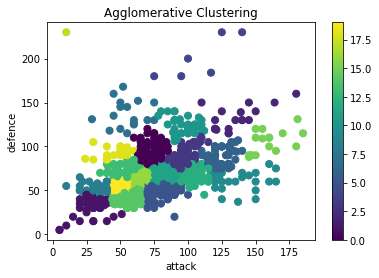

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pokemon2['attack'],pokemon2['defense'],c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('attack')
ax.set_ylabel('defence')
plt.rcParams['figure.figsize'] = (6,5)
plt.colorbar(scatter)